<a href="https://colab.research.google.com/github/chang-min-dbs/remem/blob/python_summer/Day04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 유효한 괄호 문자열인지 확인하는 프로그램
# 딕셔너리를 사용하는 코딩 테스트
# s = "()[]{}" : True
# s = "([)]" : False
# s = "{[]}" : True     //// Q1. 여기서 말한input string?은 무엇인가?

s = "{[]}"

lst = []
mapping = {")":"(", "]":"[", "}":"{"  }   #여는 괄호 일때 리스트에 순차적으로 넣었다, 닫는 괄호일때 짝이 맞다면 넘어가는것,

for char in s:                     #char라는 변수가딕셔너리에 in을 쓰는건 키가 있는지를 보는 것 벨류를 ???
    if char in mapping:
       if lst:                     # if lst의 뜻은 lst가 트루인지 물어본 것, lst는 리스트인 자료형으로 비어있으면 false 비어있지 않으면 true다
        top = lst.pop()
       else:
          top = "#"                # Q2. "#"의 뜻은 뭐임?
       if mapping[char] !=top:     # Q3. 이 !는 어디서 튀어나온 문자임, 먼지 모르겠다.
            print(False)
            break
    else:
      lst.append(char)
else:                              #for문과 동등하게 쓰인 else문--> 브레이크 실행 안됐을 시 else문 타게한다.
  print(not lst)                   #조건문상에서 비어있는 lst = []는 폴스이다, not구문은 조건문에 쓰이는 구문, not을 붙여주면 false를 바꿔주는 역학을 해서 true가 나온다.

'''
 1.문자 하나하나가 char라는 변수에 들어간다. 2.'{'는 벨류이기 때문에 if가 아닌else를 탄다.(왜? --> in은 key만 추출하기 때문에 else로 간 듯하다.)
 3.lst에 추가가 된다. 4.]}는 if문으로 간다. 5. lst는 비어있지 않은상태-> top으로 간다
 6.lst.pop()은 현재lst = [{[ ]상태 중 가장 바깥인 "[" 을 먼저 top에 담아준다.그리고 pop 특성 상 lst에서 제거 된다.
 7.if mapping[char] !=top 또다른 if문으로 내려와서 보면 현재 char = ],top=[이다.키를넣으면 char가 해당되는 벨류 "["로 바뀐다. 그래서 false가 아니다.
 Q4. key를 넣으면 해당되는 벨류가 왜 바뀌는지 모르겠고, 바뀌어서 [ = [라면 false가 출력이 되어야 하는 것이 맞지 않나?
 8. 마지막도 6~7 반복
'''

True


In [ ]:
#문자열 조작 함수
str1 = '사과-참외-딸기-메론-수박'
#split : 구분자를 기준으로 문자열을 잘라 리스트로 반환
arr1 = str1.split('-')
print(arr1)

['사과', '참외', '딸기', '메론', '수박']


In [ ]:
str2 = "Hello My Name is..."
arr2 = str2.split()#구분자가 없을 경우 기본은 공백!
print(arr2)

['Hello', 'My', 'Name', 'is...']


In [ ]:
#조각낸거 다시 합쳐보기
str3 = "".join(arr2)
print(str3)
#join함수는 리스트에 있는 것들을 하나로 합쳐준다.

HelloMyNameis...


In [ ]:
str3 = "\n".join(arr2)
print(str3)

Hello
My
Name
is...


In [ ]:
str3 = "/".join(arr2)
print(str3)
#join은 구분자를 이용해서 구분하면서 합쳐지게 만든다.

Hello/My/Name/is...


In [ ]:
text = "Hello, world!"
result = text.replace("Hello", "python")         #replace함수  (기존, 바꿀)
print(result)

python, world!


In [ ]:
result = text.replace("o","ee")
print(result)

Hellee, weerld!


In [ ]:
#모두 바뀌는걸 방지하기 위해 인덱스를 넣어줄 수 있다
result = text.replace("l","t",2)
print(result)

Hetto, world!


In [ ]:
#strip함수 = 좌우에 다른 문자가 나오기 전까지 공백을 제거 해 준다.
text = "   Hello, world   !!!  "#좌 우에 공백이 사라지고==가 생
result = text.strip()
print("=" + result + "=")  # 다른 text문자에서 긁어올 때 잘못 인식하면 공백이 무한정으로 들어가는 것을 막아

=Hello, world   !!!=


In [ ]:
text = "Hello, world"
Index = text.find("world")  #부분 문자열을 찾아 인덱스를 리턴
print(Index)

7


In [ ]:
index = text.find("l",5)
print(index)
#5는 뭐냐 --> 인덱스의 5 이후의 인덱스값을 찾으라는 뜻임

5


In [ ]:
print(text.startswith("He")) #이 문자열이 이거로 시작 되느냐
print(text.endswith("rld"))# 이 문자열이 이거로 끝나느냐

True
True


In [ ]:
text = "python"
upperstr = text.upper()        # 어퍼는 문자 전체를 대문자
print(upperstr)
lowerstr = upperstr.lower()    #문자 전체를 소문자
print(lowerstr)
capstr = text.capitalize()     #첫글자만 대문자
print(capstr)

PYTHON
python
Python


In [ ]:
text = "Hello"
print(text.isalpha())#isalpha: 문자열이 다 알파벳인지
print(text.isdigit())#문자열이 다 숫자인지
text = "12345"
print(text.isdigit())

True
False
True


In [ ]:
#함수
'''
def 함수명(매개변수):
    실행할 문장
    return 반환값  #리턴 할게 없으면 안써도 된다.
'''
def hello():            #매개변수 없어도 ():쓰기
  print("안녕~")
  print("반가워~")      # 함수 내부는 탭으로 연결 --> 여기까지가 함
print("함수 끝 직후!")  # 함수가 먼저 정의 되고 나서 메모리가 hello라는 함수가 있구나 라고 기억만 하고 있다.
hello()                 #호출 #함수 끝 직후가 출력되고 hello함수가 다시 호출되면 메모리 속 함수 영역으로 가서 함수가 정의된 곳에서부터 다시 실행된다.

함수 끝 직후!
안녕~
반가워~


In [ ]:
bye()
#호출과 선언문을 바꿔주면 정상적 작동 할 것이다.
def bye():
  print("함수 선언 전에 호출하면 에러 발생")  #여기까지만 하면 에러 발생, 호출을 안했기 때문


NameError: name 'bye' is not defined

In [ ]:
def self_input(num): #num이--> 매개변수 =  인풋(input=입력) = 파라미터
  print(f"입력받은 숫자는{num}입니다.")

for i in range(1,6):
     self_input(i)
#매개변수를 이용

입력받은 숫자는1입니다.
입력받은 숫자는2입니다.
입력받은 숫자는3입니다.
입력받은 숫자는4입니다.
입력받은 숫자는5입니다.


In [ ]:
#함수 활용  = 미.리 기능을 정해두고 얼마든지 원하는 값을 넣어주면서 계속 재사용 할 때 사용된다
def gugudan(m):
  for i in range(1,10):
    print(f"{m}*{i}={m*i:2d}")  #2d: 포멧스트링 안에서 출력할 변수 지정 후 바로 옆에 포멧을 지정한다. d = dight = 십진수를 의미  = 자리를 두자리로 지정하겠단 의미가 된다.
gugudan(2) #그래서 예쁘게 자리가 나온다.
gugudan(9)

2*1= 2
2*2= 4
2*3= 6
2*4= 8
2*5=10
2*6=12
2*7=14
2*8=16
2*9=18
9*1= 9
9*2=18
9*3=27
9*4=36
9*5=45
9*6=54
9*7=63
9*8=72
9*9=81


In [ ]:
#사칙연산
def add(a, b):
  print(f"{a:2d}와 {b:2d}의 합은 {a+b:4d}입니다.")

def sub(a, b):
  print(f"{a:2d}와 {b:2d}의 차는 {a-b:4d}입니다.")

def mul(a, b):
  print(f"{a:2d}와 {b:2d}의 곱은 {a*b:4d}입니다.")

add(2, 3)
add(10,20)
sub(2, 3)
mul(2, 3)

 2와  3의 합은    5입니다.
10와 20의 합은   30입니다.
 2와  3의 차는   -1입니다.
 2와  3의 곱은    6입니다.


In [ ]:
def something():
  return 2

r = something()  #return이라 하는 것은 함수를 실행시킨 우변에서 좌변으로 무언갈 반환할 때 반환값이 r이라는 변수에 담긴다는 뜻이다.
print(r)         #그래서 2라는 값을 r이라는 변수에 담겨서 2가 출력이 된 것이다.

2


In [ ]:
def add_sub(a, b):
  return a+b, a-b

x, y = add_sub(10, 20)
print(x, y)
  #이거 실행 안됨 --> 탭때문에 그럼

30 -10


In [ ]:
#가변 매개변수 : 변수가 몇 개 들어올지 모를 때 사용
def showNum(*args):  #args관습적임 --> 가변 파라미터/ 가변파라미터는 맨 뒤에 써야한다.
  print("args",args)
  print("args type",type(args))
  print(args)
  for i in args:
    print(i)
showNum(1,2,3,4,5)         ##가변 파라미터와 호출을 사용할 때 호출(여기에 변수)를 넣어 사용하면 되겠다.
#args로 들어가는 애들은 기본적으로 튜플이 된다.
#튜플은 리스트긴한데 수정이 안되는 리스트

args (1, 2, 3, 4, 5)
args type <class 'tuple'>
(1, 2, 3, 4, 5)
1
2
3
4
5


In [ ]:
#greet :
def greet (greeting, *args):   #이때 가변파라미터는 일반 파라미터와 썼을 때 맨 뒤에 배치해라
  for name in args:
    print(f"{greeting}, {name}")
greet("Hello", "길동", "둘리", "또치")  #greeting자리는 hello, args자리는 길동 둘리 또치로 튜플로 들어간다.

길동, Hello
둘리, Hello
또치, Hello


In [ ]:
#가변 파라미터 활용
def get_mx(*num):  #최댓값을 반환 ---> 초깃값을 작은 거로 주는게 좋다.
  max = -1
  for i in num:    #
    if max < i:
       max = i
  return max

def get_mn(*num):  #최솟값을 반환
  min = 999999
  for i in num:
    if i <min:
      min = i
    return min

print(get_mx(1, 11, 41, 55, 34))
print(get_mn(1, 11, 41, 55, 34))

55
1


In [ ]:
#입력받은 숫자들의 합과 평균을 동시에 리턴하는 함수
#len(tuple) <--- 이거로 콜렉션 요소가 몇개인지 알 수 있었다, 이용하기
def sum_avg(*num):
  sum = 0                      #변수 초기화 먼저 해주기
  for i in num:                #누적합 먼저 해준 것
    sum += i
    return sum, sum/len(num)   # 누적합에서 튜플의 요소개수 센 것을 나눈다.== 평

print(sum_avg(1,2,3,4,5,6,7))

(1, 0.14285714285714285)


In [ ]:
#모듈
#언제든지 사용할 수 있는 외부의 변수, 함수 모음집 # import를 써야지 외부에서 기능을 갖고온다.
import random   #random이라는 외부기능 모음집 사용하겠다는 의미  #random모듈 : 임의의 난수을 만들어주는 기능을한다

print(random.randint(1,4))  #임의의 수를 출력하는 것

2


In [ ]:
lucky = ['당첨','꽝','꽝','꽝','한번 더']

while True:
  input()   # 원랜 a = 이렇게 사용됐는데, 이번처럼 쓰면 사용자 키도브를 입력받은 것처럼 사용가능
  result = random.choice(lucky)  #random.choice는 랜덤 모듈안에 있는 메소드이다. #콜렉션 자료구조에서 랜덤으로 하나를 선택한다
  if result == '당첨':
    print('당첨입니다!')
    break
  else:
    print(f"{result}입니다, 다시 시도해보세요")

ㅇ
꽝입니다, 다시 시도해보세요
2
꽝입니다, 다시 시도해보세요
1
꽝입니다, 다시 시도해보세요
10
꽝입니다, 다시 시도해보세요
20
당첨입니다!


In [ ]:
import time

time.sleep(3)
print('3초 뒤 실행')

3초 뒤 실행


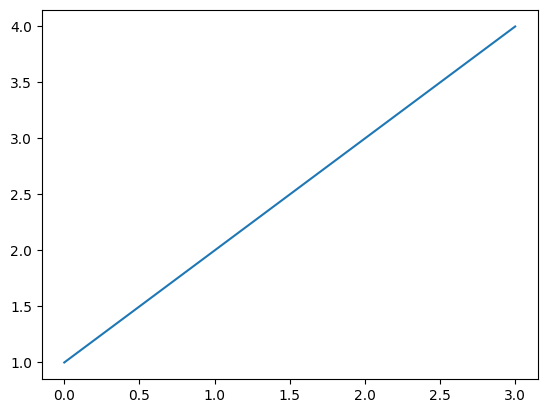

In [ ]:
import matplotlib.pyplot as plt  #그래프 그리는 모듈이다. 해주는건데 줄여서 plt라 쓴다
#as : 별칭 = alias 이렇게 별칭으로 지정해주면 짧게 타이핑이 가능하다  matplotlib.pyplot.plot(~~)
plt.plot([1,2,3,4])
plt.show()

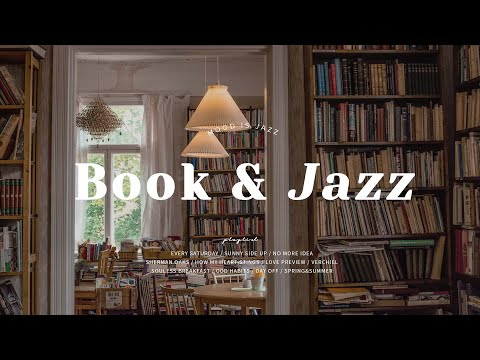

In [ ]:
#유튜브 모듈
#유튜브의 v다음 링크를 가져오기
#WXJgoBxMKVU
from IPython.display import YouTubeVideo

YouTubeVideo('WXJgoBxMKVU',width=500, height=400)

In [ ]:
#class = 객체지향 프로그램의 핵심 = 내가 사용할 기능들이 비슷하다 할 때 미리 틀을 만들어놔 이 틀을 이용해 기능들을 빠르게 생성할 수 있게끔 도와주는 문
#클래스란 틀을 이용해 실제로 작동하는 것들(기능) = 객체 = instance
#

In [ ]:
#from inspect import ArgSpec
#from typing_extensions import AsyncGenerator
# class의 틀에 __init__(=생성자라는 뜻) 속에 name,age라는 것이 들어감

class Person:                     #이렇게 클래스 정의한다.
  def __init__(self, name, age):  #생성자라고 하는 class 내부 함수 #파이썬에선 첫번째 키워드에서 self는 무조건 들어가야함 // 변수선언 편하게 쓰려고 쓰는 함수이다.
      self.name = name            #self는 instance 하나하나를 가르키는 것이라 보면 된다.
      self.age = age              # <-- 이렇게 하면 클래스 내부에 또다른 변수로 들어간다.

p1 = Person("Alice",30)
p2 = Person("Bob",25)
print(f"{p1.name}의 나이는 {p1.age}이다")
print(f"{p2.name}의 나이는 {p2.age}이다")

#즉, 클래스가 틀이라고 하면 클래스 이름으로 생성한 객체가 실제 쓰이는 instance라는 개념이다.
'''
클래스 이름으로 p1,p1를 준다.그럼 class를 프레임으로 하는 새로운 객체가 만들어지게 되는 것이다.
그래서 p1,p2 모두 각각의 instance로 생성 되서 name,age를 갖게 된다.
변수에 어떤 instance를 할당 할 때 제일 먼저  실행되는 함수(메서드)가 생성자라고 한다.    --->????

'''


Alice의 나이는 30이다
Bob의 나이는 25이다


In [ ]:
class Person:
  def __init__(self, name, age): #생성자라는 함수 #self는 무조건 들어가야함 #생성자라고 하는 class 내부 함수 /
    self.name = name
    self.age = age
  def greet(self):  #또다른 함수 #클래스 내부에 그릿 함수는 마치 매개변수 하나 가지고 있는것과 마찬가지인 형태다.
    print(f"Hello,my name is {self.name} and my age is {self.age}")
    #하지만 self매개변수는 바깥에 쓰이지 않기 때문에 그릿 메소드를 인스턴스에서 호출했을 땐 매개변수가 없는 것처럼 보이는 호출이 일어날 것이다.

p1 = Person("Alice",30)    #p1 = 변수
p2 = Person("Bob",25)
print(f"{p1.name}의 나이는 {p1.age}이다")
print(f"{p2.name}의 나이는 {p2.age}이다")
p1.greet() #인스턴스에서 호출에서 했을  하나도 없는것??처럼
p2.greet()

Alice의 나이는 30이다
Bob의 나이는 25이다
Hello,my name is Alice and my age is 30
Hello,my name is Bob and my age is 25


In [ ]:
#다른 언어들은 클래스 내부 변수들이 def __init_ 밑에 정의가 안된다.
#파이썬은 생성자 밑에 변수를 정의한다. -->p1
#모든 instance에서 똑같은 변수에 접근하고 싶을 때
class Person:
  species = "Homo sapiens"       #class변수 : 모든 객체가 동일하게 공유
  def __init__(self, name, age): #생성자라고 하는  class 내부함수
    self.name = name #instance 변수
    self.age = age  #객체를 생성할 때마다 달라지는 변수
  def greet(self):
    print(f"Hello,my name is {self.name} and my age is {self.age}")

p1 = Person("Alice",30)
p2 = Person("Bob",25)
print(p1.species)  #그래서 (instance. 변수이름)하면 접근이 가능하다.
print(p2.species)

#person내부에 species,name,age라는 변수가 있다.p1에서 클래스 이름인 species값을 참조하게 된다면 instance변수인 name과age는 따로 받게된다..?

AttributeError: 'Person' object has no attribute 'species'

In [ ]:
print(p1)
# 어떤 프로그램이 실행이 될 때 빠른 실행을 위해 프로그램 내에 여러개의 process나 thread라는 것들이 겉보기엔 동시에 실행하는 것처럼 실행해준다. --> 그 중 하나가 __main__이다.
#person : class, object : 객체

In [ ]:
print(p1.__dict__)  #instance변수들을 딕셔너리 형태로 출력해준다.
#class는 틀을 만들어주는 기능, 틀에 넣지 않아도 기본적으로 사용할 수 있는 변수들이 있다.

{'name': 'Alice', 'age': 30}


In [ ]:
class WareHouse:               #클래스 이름은 대문자로 시작이 관습
  stock_num = 0
  def __init__(self, name):    # 생성자는 클래스에 인스턴스를 할당 시키는 역할도 같이 한다.
    self.name = name                #인스탠스 변수로 네임을 갖고 있다.
    WareHouse.stock_num += 1         #클래스 변수에 접근
  def __del__(self):           #소멸자 # __del__은 생성자와 동일하게 클래스 내부에서 선언하기 위해 특수한 규칙를 갖고있다.그냥 생성자처럼해라.
    WareHouse.stock_num -= 1

w1 = WareHouse("Incheon")      #생성자는 인잇으로 설정했어도 함수이름을 인스턴스로 할당 할 때 최초로 실행된다.
w2 = WareHouse("seoul")
print(WareHouse.stock_num)     #클래스도 어딘가에 미리 저장이 되는 함수이기 때문에 클래스 이름으로 바로 클래스변수에 접근
print(w1.stock_num)
print(w1.name)
del w1                         #이건 규칙적인 모양 #이런 특수한 문법을 통해서만 실행이 가능하다. +소멸자는 w1이라는 인스턴스를 메모리에서 제거하는 역할도 한다.
print(WareHouse.stock_num)     #소멸자 호출

#클래스 변수는 class.~~ +=1 (클래스 이름으로 접근해 수정했을 때) 모든 클래스로 만들어진 인스턴스가 그 값을 모두 공유할 수 있다.
#클래스 내부엔 생성자 소멸자가 기본으로 있지만 쓰는 이유는 재정의해서 내 입맛대로 기능하기 위함

2
2
Incheon
1


In [ ]:
class Korean:
  country = '한국'                    #클래스변수 = 모든 인스턴스가 공유를 할수 있기 때문에 클래스 이름으로도 접근이 가능
  def __init__(self, name, age):      #생성자라고 하는  클래스 내부 함수
    self.name = name                  #인스탠스 변수로 네임과 에이지가 있다.
    self.age = age
  def __del__(self):
    print("destroy the object")
  def yell(self):
    print(f"{self.name}이 외쳤다!")

k1 = Korean("민수", 20)
print(k1.name)
print(k1.country)      # 인스탠스 이름으로 접근
print(Korean.country)  #클래스 이름으로 접근
k1.yell()              #?
del k1                 #소멸자를 불렀더니 destroy the object 출력

민수
한국
한국
민수이 외쳤다!
destroy the object


In [ ]:
#상속 :  기존 클래스에서 다른 클래스를 만들고 싶을 때 다시 쓰지 않고 클래스2에 물려주도록하는 것
class Person:
  def __init__(self, name, age):
    self.name = name
    self.age = age
  def greet(self):
   print(f"Hello, my name is {self.name}")

class Student(Person):
  def __init__(self, name, age, subject):
    super().__init__(name, age)  #super클래스는 부모 클래스에 접근할수 있는 접근자이다. 즉, 부모클래스의 생성자에 접근을 해서 먼저 name, age초기화 하고 부모 클래스에 없던 subject까지 초기화 하는걸 볼 수 있다.--> Q. 초기화??를한다고?
    self.subject = subject       #greet을 써주지 않더라도 person에 있는 기능을 이미 갖고 있기 때문에 인스탠스s를 greet,student 함수 둘다 사용 가능하다.
  def study(self):
    print(f"{self.name}이 {self.subject}를 공부한다")

s = Student("Alice", 20, "math")
s.greet()
s.study()
    #person클래스-->student클래스로 상속받고 있는 과정이다
    #super클래스를 왜 해주냐--> 이왕 상속받은거 이미 있는 name,age 사용하자는 의미이다. 관습적임.

Hello, my name is Alice
Alice이 math를 공부한다


In [ ]:
#오버라이딩 :상위 클래스가 가지고 있는 메서드를 하위 클래스가 재정의해서 사용하는 것을 의미한다.
#animal이란 기초 클래스를 만듬 - sound라는 함수 구현 - 상속받는 클래스에는 sound 함수를 다시 정의 해야한다 라는 규칙 만들어내는 것
#오버로딩 : 함수를 이름을 똑같이 한 다음 파라미터 개수로 다른함수 취급하는 것 --> print(num1), print(num1, num2) --> 근데 파이썬엔 이 기능 없다.
class Animal:
  def sound(self):
   raise NotImplementedError("상속받은 클래스는 이걸 구현하세요!") # 이거 어디감?  - 지웠음
    #print("동물이 우는 소리")

class Dog(Animal):
  def sound(self):      #함수 재정의  = 오버라이딩
    #super().sound()
      print("멍멍")

class Cat(Animal):
  def sound(self):
      print("야옹")

d = Dog()
d = Cat()
Dog.sound()
Cat.sound()
# 상속을 받으면 정의 없이도 sound 함수를 불러올 수 있지만
#오버라이딩이란 개념은 기초 클래스에 이미 정의 되어 있던 함수를 상속받는 클래스들에서 각기 다른 형태로 똑같이 구현해서 써야한다 이렇게 강제할 때도 쓸 수 있다.
#

TypeError: Dog.sound() missing 1 required positional argument: 'self'